<a href="https://colab.research.google.com/github/HendraMohammed/Punokawan/blob/main/PCDUas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mohammad Hendra Ferdiansyah (191080200262)

In [ ]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 [==============================] - 7s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

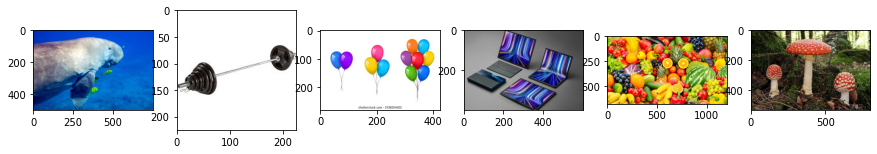

(6, 480, 480, 3)


In [ ]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://asset.kompas.com/crops/_Josz4TDtNbWeUTaiXBV0Ks3sh0=/0x0:990x660/750x500/data/photo/2020/07/22/5f17db46b1624.jpg")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJu-0rVtJjpBrKcaAcoqWb5AzM1-7KtIl48w&usqp=CAU")
urls.append("https://www.shutterstock.com/image-vector/balloons-3d-bunch-set-thread-260nw-1938354502.jpg")
urls.append("https://cdn.idntimes.com/content-images/post/20220121/zenbook-17-fold-oled-ux9702-versatile-modes-236d83991946eb35b8785364db79db16_600x400.jpg")
urls.append("https://img-cdn.medkomtek.com/e9rOlqEYKr_bbhp9Nk4nJDC4lFs=/0x0/smart/filters:quality(75):strip_icc():format(webp)/article/IDAAIeoGFsdRns-wCBA4Y/original/014055800_1604479989-Mau-Diet-Hindari-Makan-Buah-Buah-Tinggi-Kalori-Ini-shutterstock_770613370.jpg")
urls.append("https://asset-a.grid.id/crop/0x0:0x0/x/photo/2021/04/17/jamur-amanita-beracunjpg-20210417065035.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [ ]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 20 and np.argmax(yh[i])<=268 ):
      print("Dugong")
  elif(np.argmax(yh[i]) >= 900 and np.argmax(yh[i])<=999 ) :
      print("Jamur")
  elif(np.argmax(yh[i]) >= 617 and np.argmax(yh[i])<=629 ) :
      print("Laptop")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=488):
      print("Barbel") 
  else:
      print("Lainya")

1/1 [==============================] - 6s 6s/step
Dugong
Barbel
Barbel
Lainya
Jamur
Jamur


In [ ]:
yh.shape

(6, 1000)

In [ ]:
yh[1]

array([1.33068650e-04, 1.01702411e-04, 1.09135530e-04, 1.01321275e-04,
       1.02419261e-04, 2.10429644e-04, 1.56305585e-04, 1.41197263e-04,
       1.55464877e-04, 1.60669922e-04, 8.41008878e-05, 1.59875126e-04,
       1.14709386e-04, 1.48844032e-04, 2.45051720e-04, 1.44859194e-04,
       1.68621686e-04, 9.96010931e-05, 1.28519401e-04, 1.50545282e-04,
       1.84476376e-04, 9.86229061e-05, 1.14013012e-04, 7.99539921e-05,
       2.31855709e-04, 1.70083804e-04, 1.30292785e-04, 1.38561634e-04,
       1.45788581e-04, 1.24449260e-04, 1.28898668e-04, 1.51299042e-04,
       1.33225461e-04, 1.30178771e-04, 1.42981589e-04, 1.30873726e-04,
       1.08420762e-04, 1.15431583e-04, 1.00368015e-04, 1.32048081e-04,
       1.18250013e-04, 9.90258122e-05, 7.72302374e-05, 1.31653374e-04,
       8.83525790e-05, 1.39151045e-04, 1.25453676e-04, 1.24785947e-04,
       1.78989852e-04, 8.88328941e-05, 1.52512308e-04, 1.02878577e-04,
       1.32369591e-04, 1.75290319e-04, 1.90213075e-04, 1.69485182e-04,
      

In [ ]:
np.argmax(yh[1])

422